<a href="https://colab.research.google.com/github/ertnbrk/MachineLearning/blob/main/PolinomalRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [2]:
data = pd.read_csv("bottle.csv")

In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


T_degc (Celcius tipinden sıcaklığı) ve Salnty(Tuzluluk oranı) bu iki sütunu kullanıcam biri bağımsız biri bağımlı değişken olucak şekilde

In [4]:

datas_df = data[["T_degC","Salnty"]]
#Sutunları yeniden isimlendiriyorum
datas_df.columns = ["Sicaklik","Tuzluluk"]

datas_df.head()

,Sicaklik,Tuzluluk
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


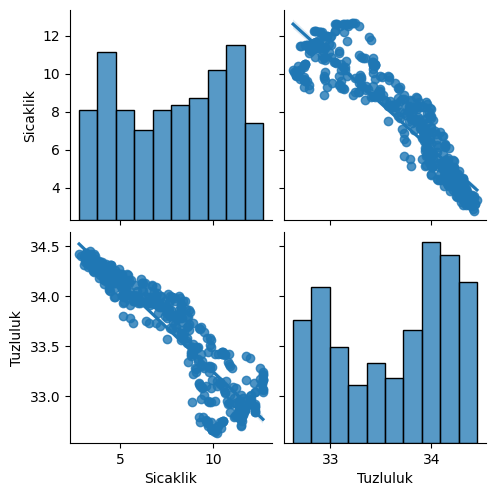

In [5]:
  import seaborn as sns
  sns.pairplot(datas_df,kind="reg")

In [6]:
datas_df.shape


(500, 2)

In [7]:
#Null veri var mı ?
datas_df.isnull().sum()

Sicaklik    1
Tuzluluk    6
dtype: int64

In [8]:
#Null verilerin olduğu satırları düşür

datas_df.fillna(method="ffill",inplace=True)
datas_df.isnull().sum()

<ipython-input-8-af9c788003bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_df.fillna(method="ffill",inplace=True)


Sicaklik    0
Tuzluluk    0
dtype: int64

In [9]:


X = np.array(datas_df["Tuzluluk"]).reshape(-1,1)
y = np.array(datas_df["Sicaklik"]).reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

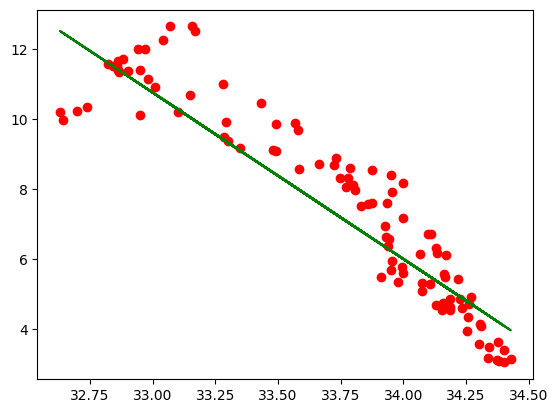

In [11]:

from sklearn.linear_model import LinearRegression

dogrusal_reg = LinearRegression()

dogrusal_reg.fit(X_train,y_train)

y_pred = dogrusal_reg.predict(X_test)

plt.scatter(X_test,y_test,color="r")
plt.plot(X_test,y_pred,color="g")
plt.show()

# **Grafiktede gözlemliyoruz çizgimizin eğimli olması doğruluk değerimizi arttırıcaktır**

In [12]:


from sklearn.preprocessing import PolynomialFeatures

poli_reg = PolynomialFeatures(degree=4) #Polinomal regresyon tanımlıyoruz ve derecesini veriyoruz

transform_poli = poli_reg.fit_transform(X_train) # X eğitim verileri bu polinoma uydurulur ve dönüştürülür

dogrusal_reg2 = LinearRegression()

dogrusal_reg2.fit(transform_poli,y_train)

poli_tahmin = dogrusal_reg2.predict(transform_poli)


# **Polinomal regresyonda transform ederek X_traini polinoma dönüştürülmüş haliyle linear regresyona sokuyoruz !**

In [13]:
from sklearn.metrics import mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_train,poli_tahmin)) #hata kareler ortalaması
r2 = r2_score(y_train,poli_tahmin)  #r2 skoru

print("Test verisi için kök karesel ortalama hata: " + "{:.2}".format(rmse))
print("Test verisi için R2 skoru : "+"{:.2}".format(r2))

Test verisi için kök karesel ortalama hata: 0.85
Test verisi için R2 skoru : 0.92


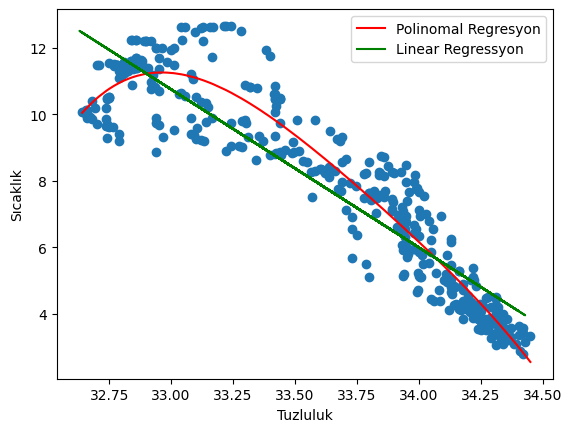

In [14]:
#Görselleştirme

plt.scatter(X_train,y_train)  #saçılım grafiği
'''
Operatör kütüphanesi ile sıralama (fermuarlama yapıyoruz)
0 dan başlıyor sıralıyor sonra polinoma uygun şekilde fermuarlıyor
Bunların detayları anlatılmadı araştırmanı öneririm
'''

import operator

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,poli_tahmin),key = sort_axis)
X_train,poli_tahmin = zip(*sorted_zip)



plt.plot(X_train,poli_tahmin,color="r",label="Polinomal Regresyon")
plt.plot(X_test,y_pred,color="g",label="Linear Regressyon")
plt.xlabel("Tuzluluk")
plt.ylabel("Sıcaklık")
plt.legend()
plt.show()

### **Gözle de görüldüğü üzere polinomal regresyon daha isabetli**

# Predict

In [15]:
#Doğrusal regresyon sonuçlarına göre 33.82 tuzluluk derecesine karşılık gelen bir önreğin sıcaklığını tahmin etmeye çalışalım

dogrusal_reg.predict([[33.82]])



array([[6.8536182]])

In [16]:
#Polinomal regresyon sonuçlarına göre 33.82 tuzluluk derecesine karşılık gelen bir önreğin sıcaklığını tahmin etmeye çalışalım

dogrusal_reg2.predict(poli_reg.fit_transform([[33.82]]))

array([[7.38823235]])